In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('electronic_payment.csv')

In [3]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
df.tail()

step      type     amount     nameOrig  oldbalanceOrg  \
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1048570       347245.65   C435674507       484329.37       616886.72        0   
1048571        80627.64   M668364942            0.00            0.00        0   
1048572         6404.95  M1355182933            0.00            0.00        0   
1048573        80584.95  M1964992463            0.00            0.00        0   
1048574        69134.92   M677577406            0.00            0.00        0   

         isFlaggedFraud  
1048570               0  
1048571               0  
1048572               0  
1048573               0  
1048574               0

In [5]:
df.shape

(1048575, 11)

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [10]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06       1048575.0  
mean     9.781600e+05    1.114198e+06  1.089097e-03             0.0  
std      2.296780e+06    2.416593e+06  3.298351e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
50%      1.263772e+05    2.182604e+05  0.000000e+00             0.0  
75%      9.159235e+05    1.149808e+06  0.000000e+00             0.0  
max      4.210000e+07    4.220000e+07  1.000000e+00             0.0

In [11]:
df.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
isFlaggedFraud          1
dtype: int64

In [12]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')

Numerical type columns:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import numpy as np

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

In [17]:
df['step'].value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

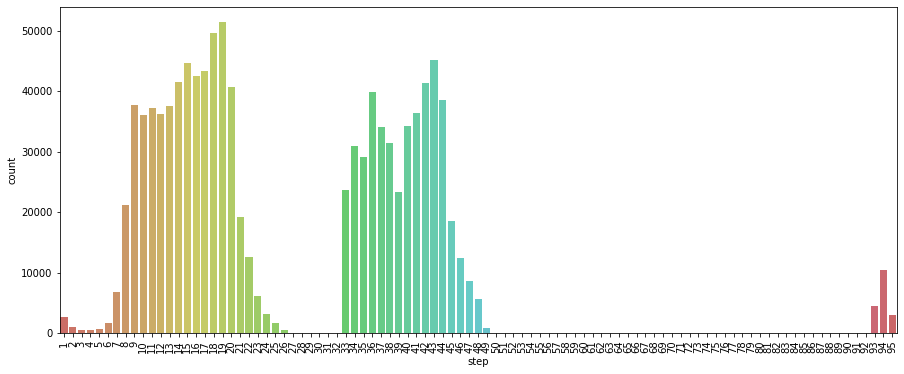

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(df['step'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [19]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [20]:
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

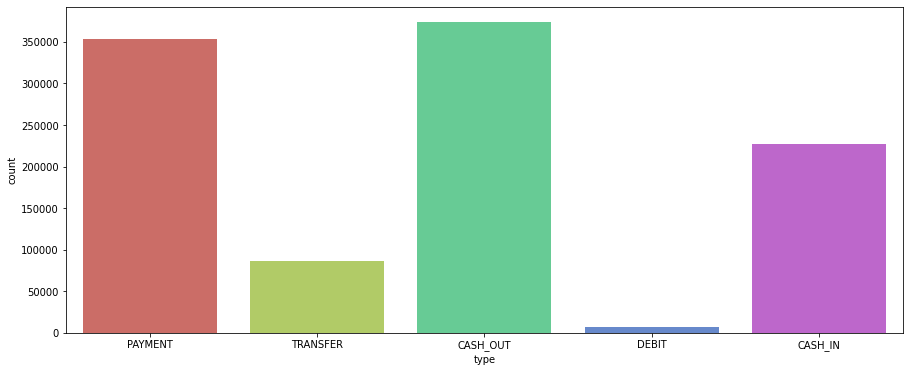

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df['type'], data = df, palette = 'hls')
plt.show()

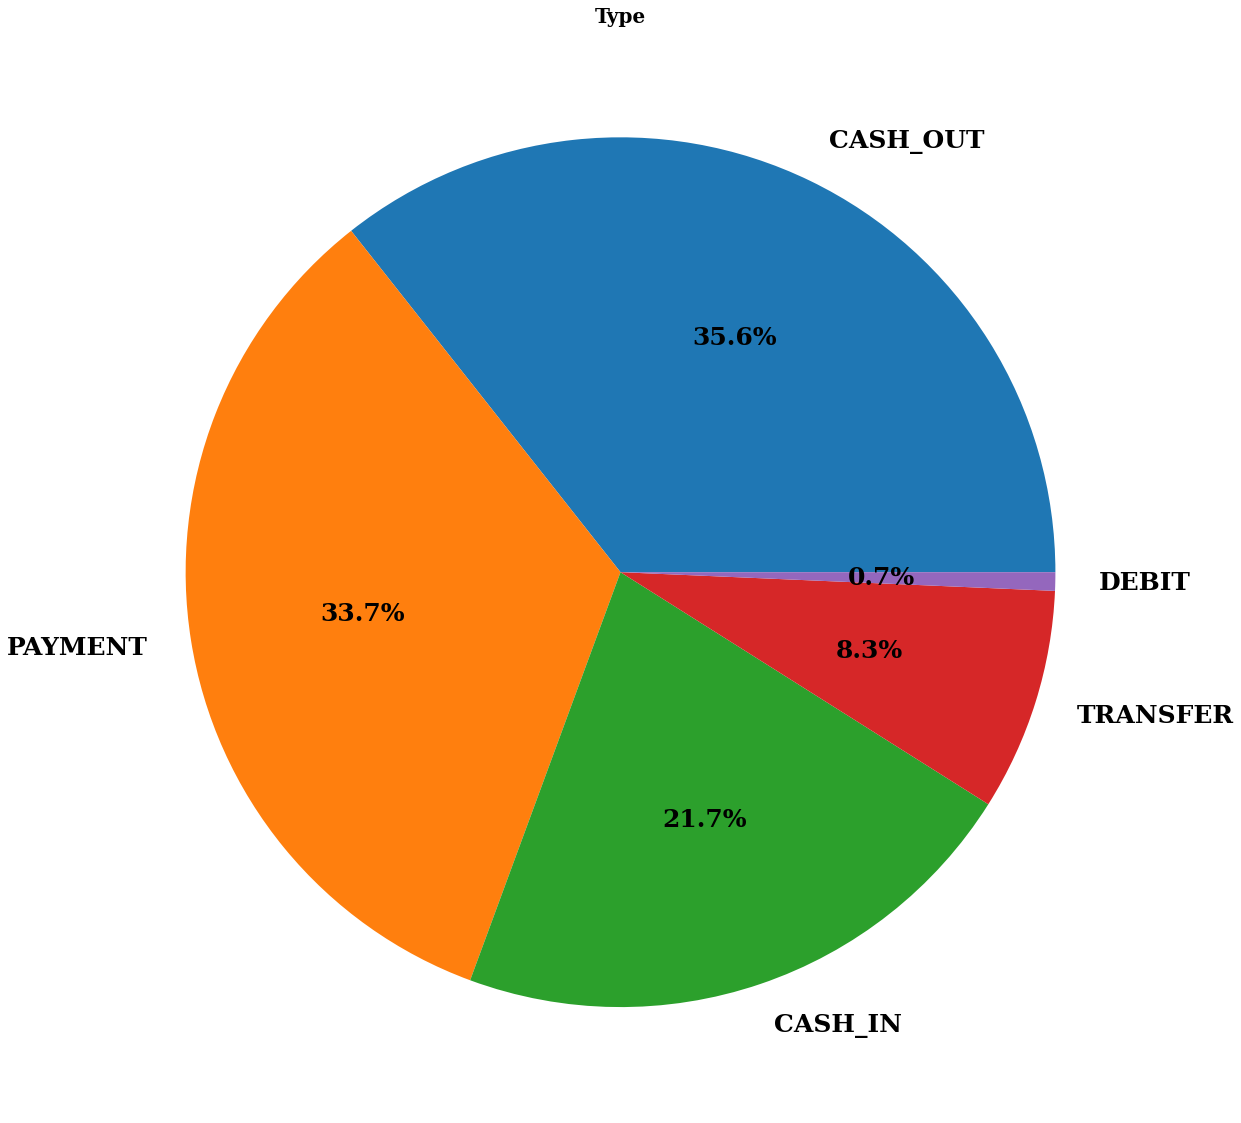

In [22]:
plt.figure(figsize=(30,20)) 
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Type', size=20, **hfont) 
plt.show()

In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [24]:
bar_chart_type = px.bar(df['type'].value_counts(), title='Frequency of Transaction Types')
bar_chart_type.show()

In [25]:
pie_chart_type = go.Figure(data=[go.Pie(labels=df['type'].unique(), values=df['type'].value_counts())])
pie_chart_type.update_layout(title='Proportion of Transaction Types')
pie_chart_type.show()

In [26]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [27]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

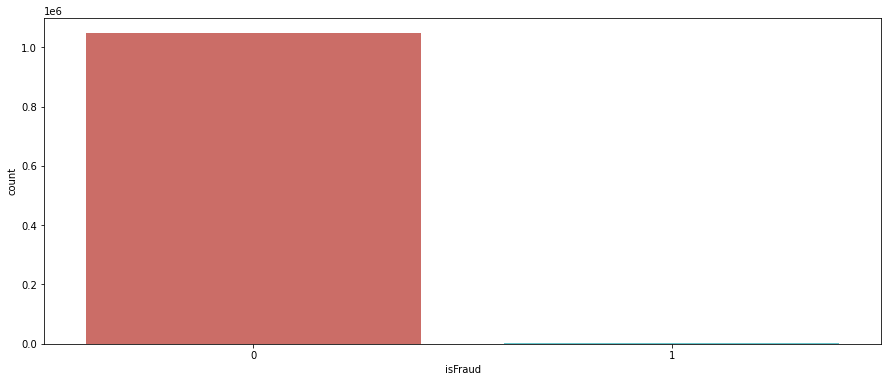

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(df['isFraud'], data = df, palette = 'hls')
plt.show()

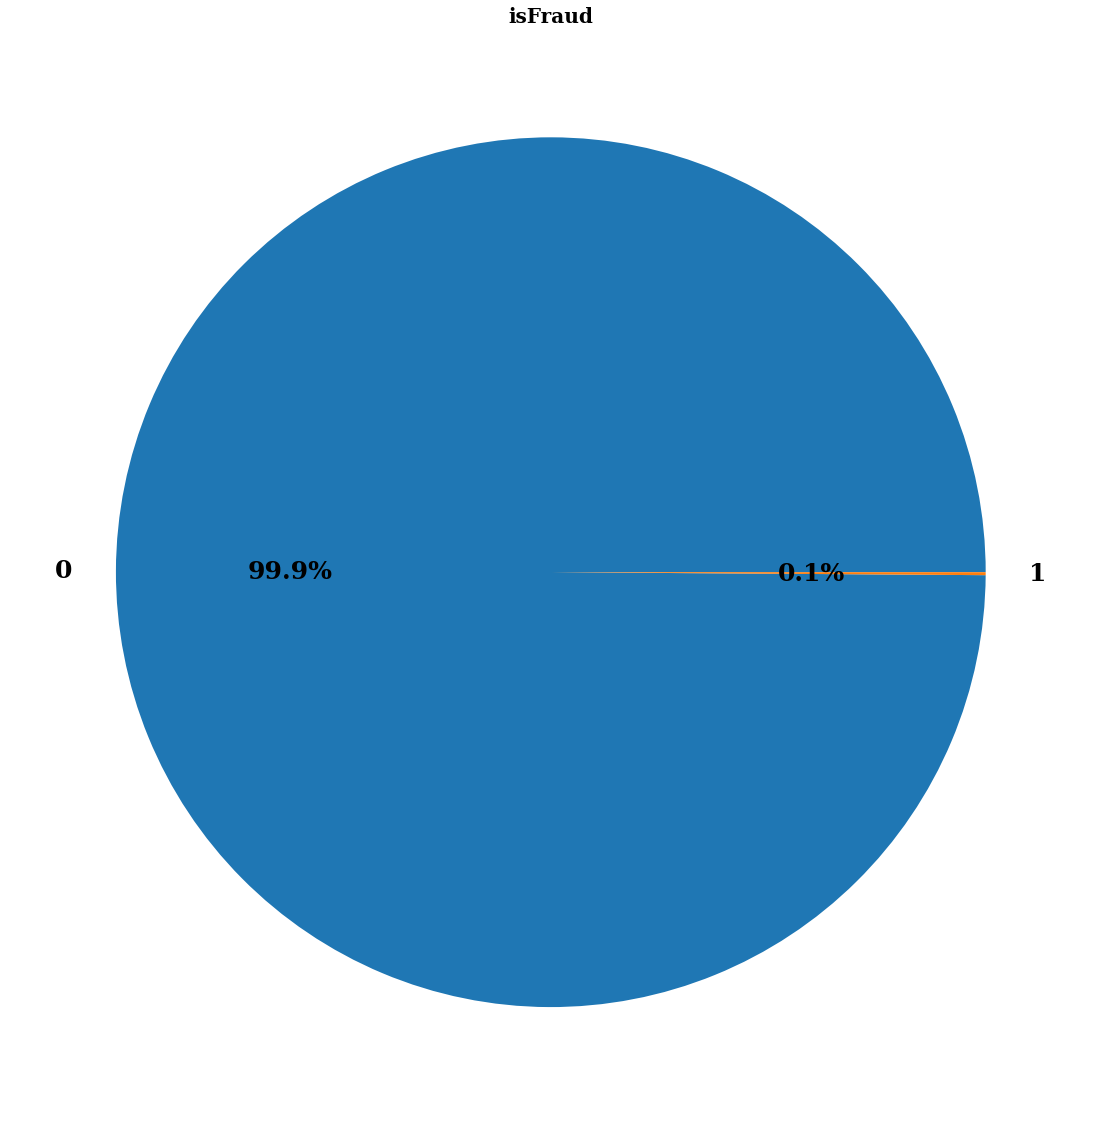

In [29]:
plt.figure(figsize=(30,20)) 
plt.pie(df['isFraud'].value_counts(), labels=df['isFraud'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('isFraud', size=20, **hfont) 
plt.show()

In [30]:
bar_chart_type = px.bar(df['isFraud'].value_counts(), title='Frequency of Fraudulent Transactions')
bar_chart_type.show()

In [31]:
pie_chart_fraud = go.Figure(data=[go.Pie(labels=df['isFraud'].unique(), values=df['isFraud'].value_counts())])
pie_chart_fraud.update_layout(title='Proportion of Fraudulent Transactions')
pie_chart_fraud.show()

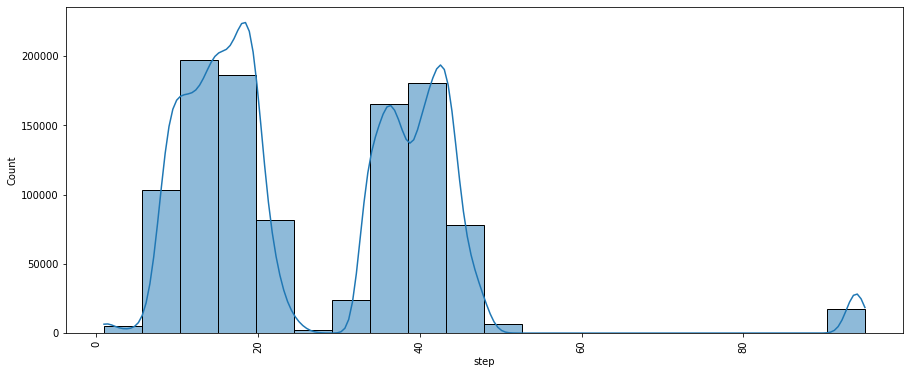

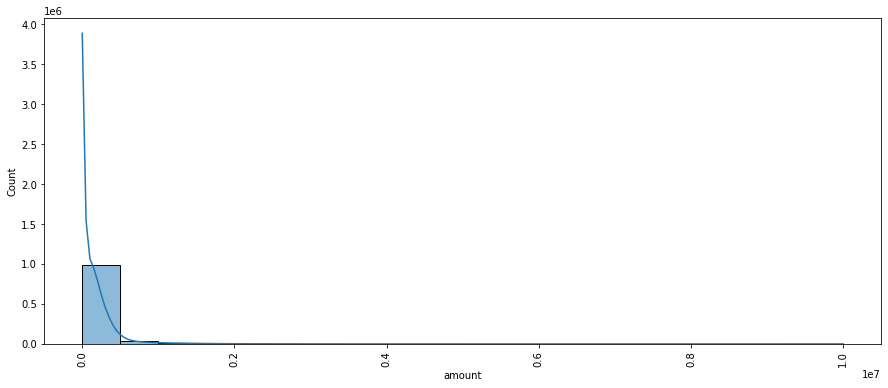

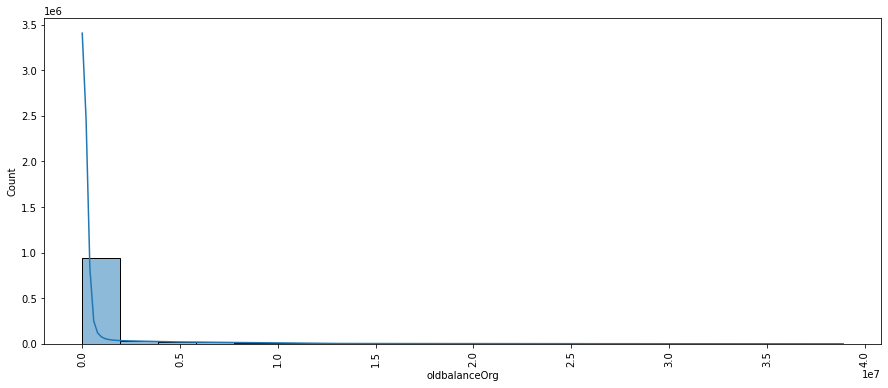

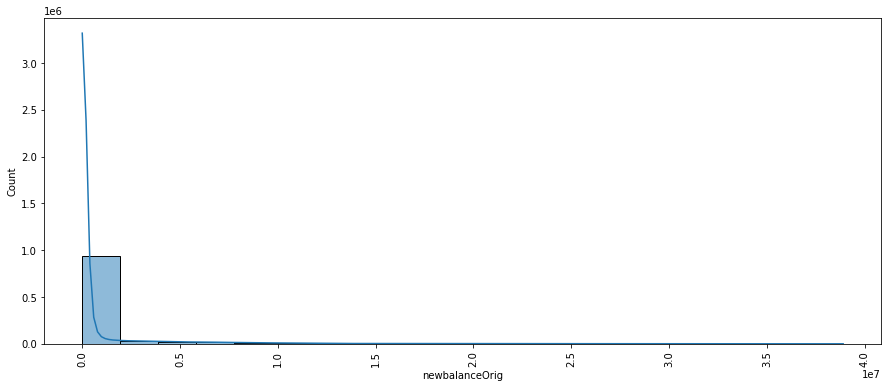

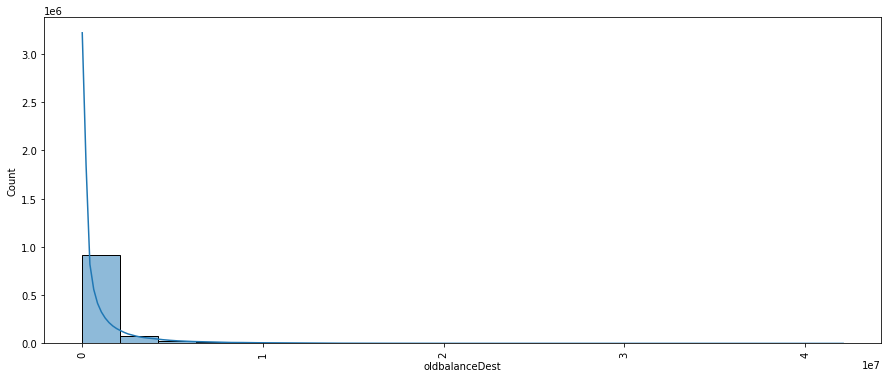

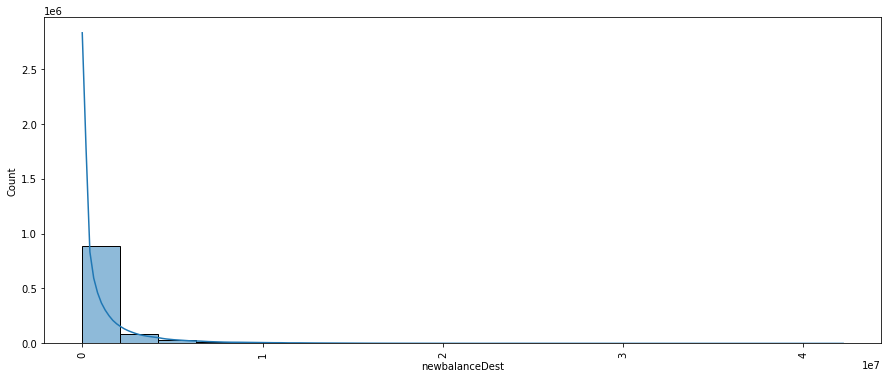

In [32]:
for i in numerical_columns:
    if i != 'isFraud':
        if i != 'isFlaggedFraud':
            plt.figure(figsize=(15,6))
            sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
            plt.xticks(rotation = 90)
            plt.show()

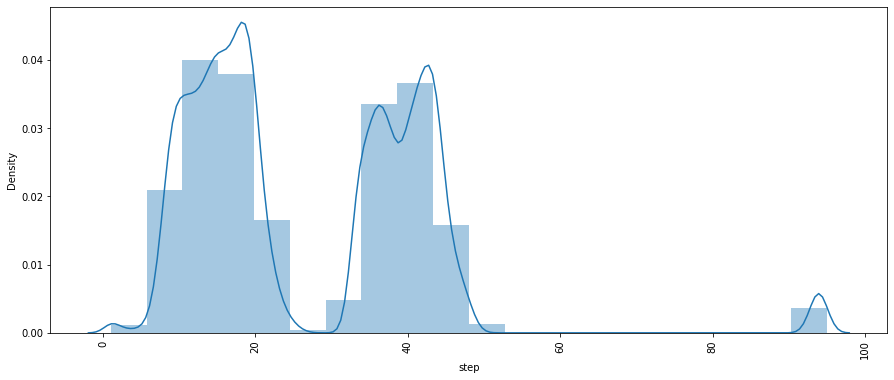

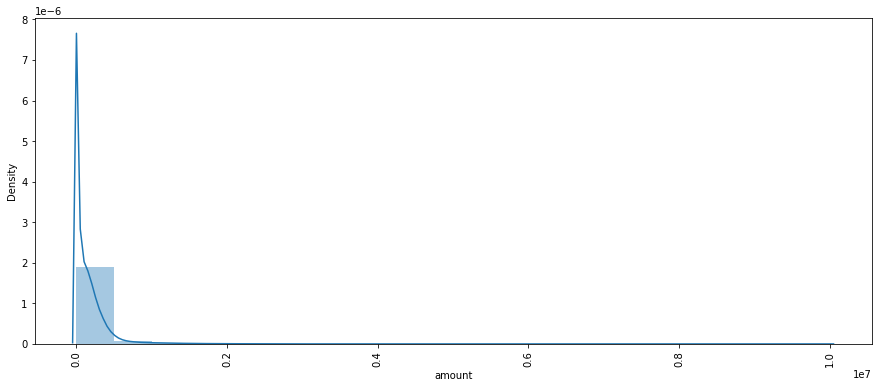

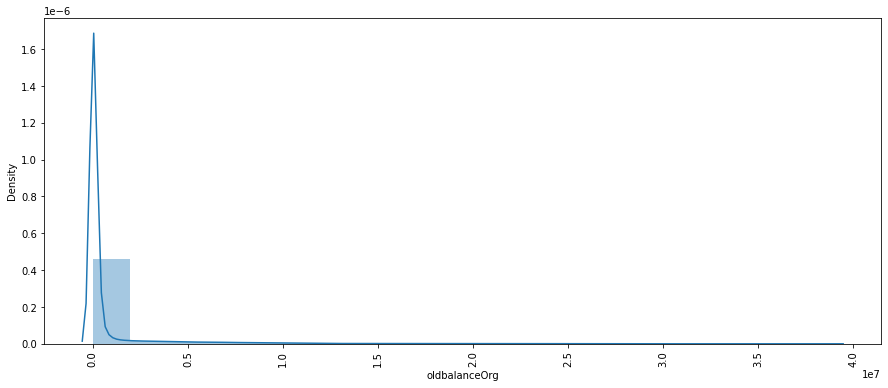

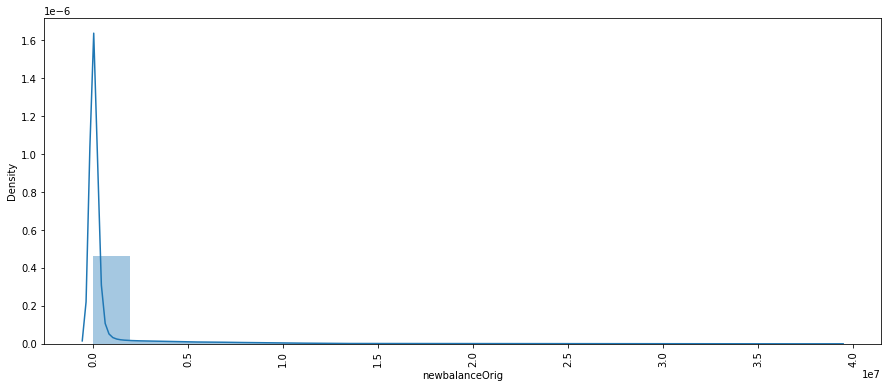

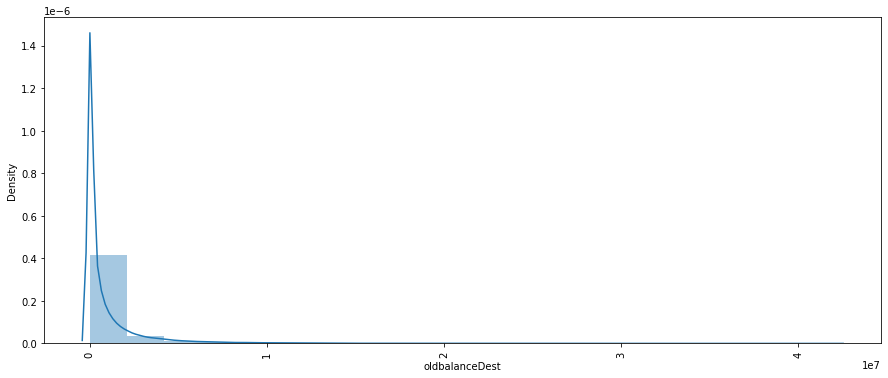

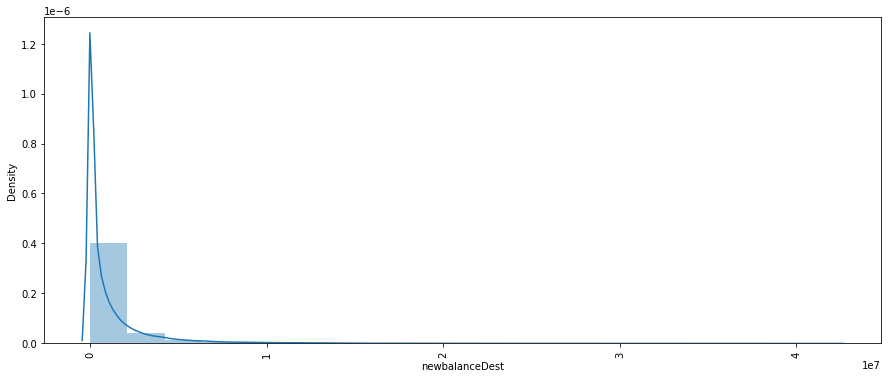

In [33]:
for i in numerical_columns:
    if i != 'isFraud':
        if i != 'isFlaggedFraud':
            plt.figure(figsize=(15,6))
            sns.distplot(df[i], kde = True, bins = 20)
            plt.xticks(rotation = 90)
            plt.show()

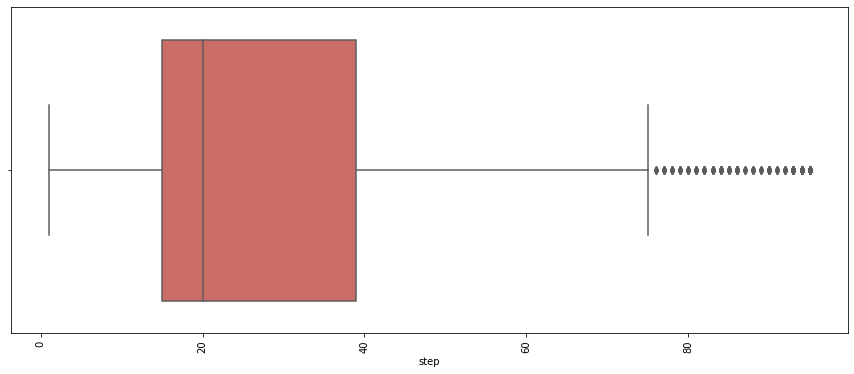

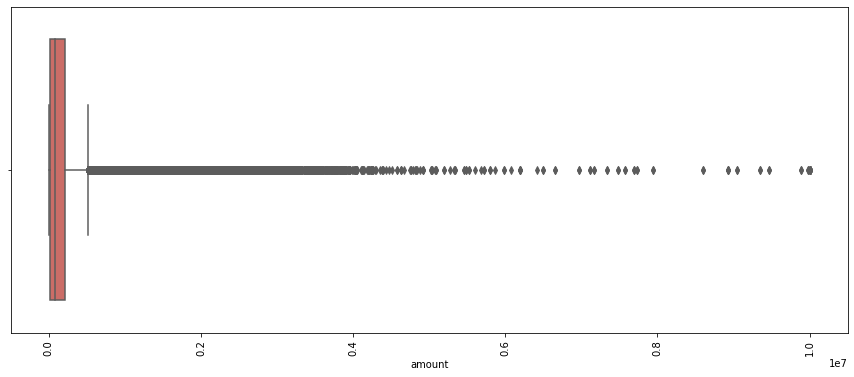

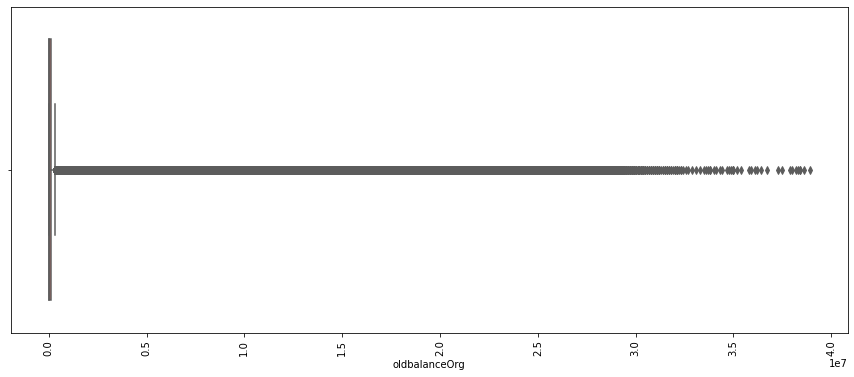

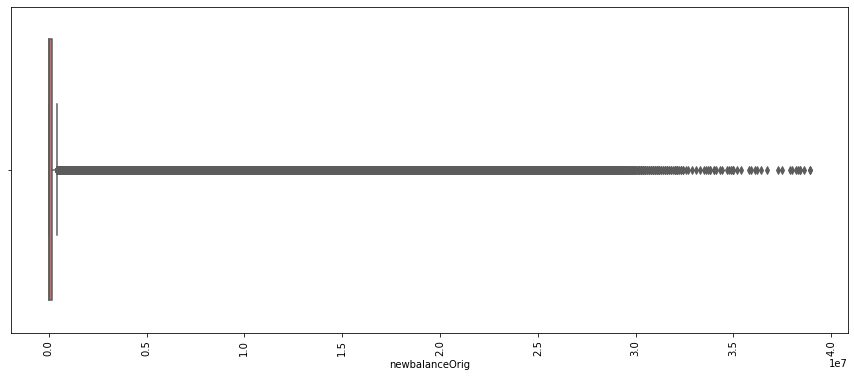

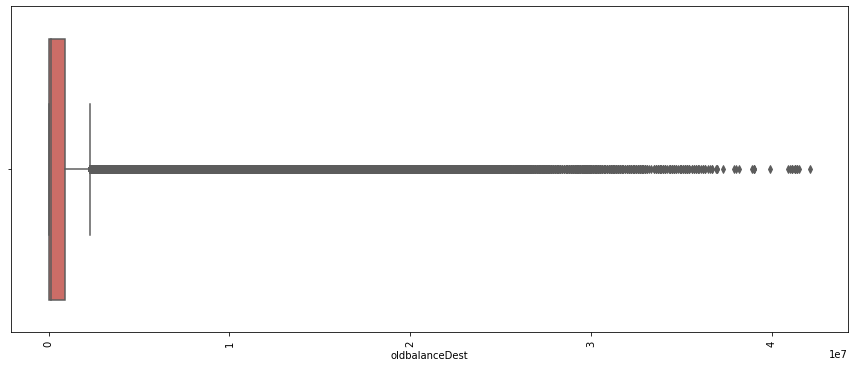

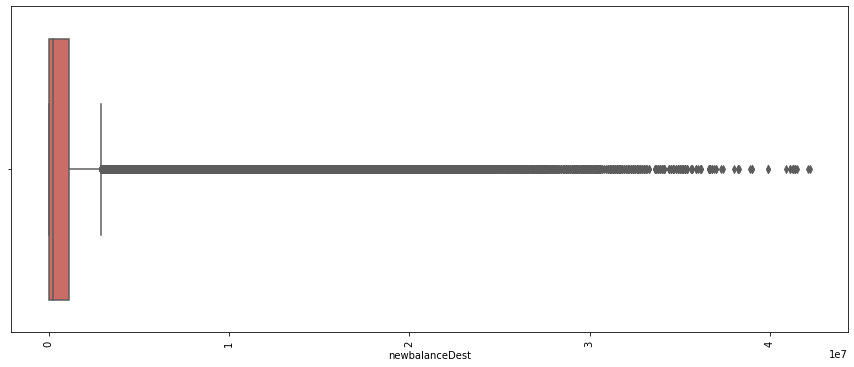

In [34]:
for i in numerical_columns:
    if i != 'isFraud':
        if i != 'isFlaggedFraud':
            plt.figure(figsize=(15,6))
            sns.boxplot(df[i], data = df, palette = 'hls')
            plt.xticks(rotation = 90)
            plt.show()

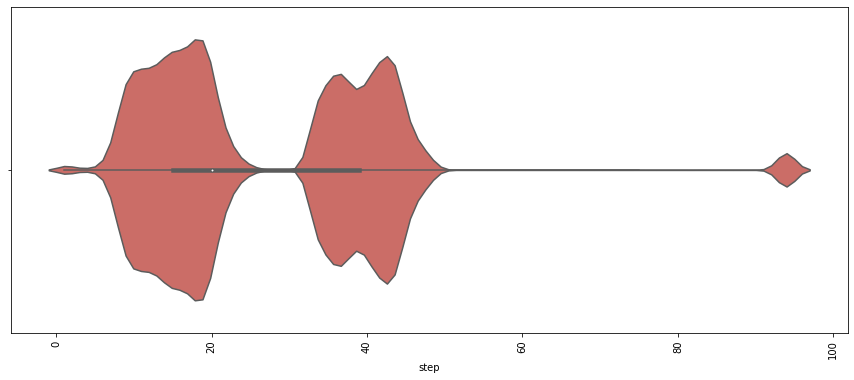

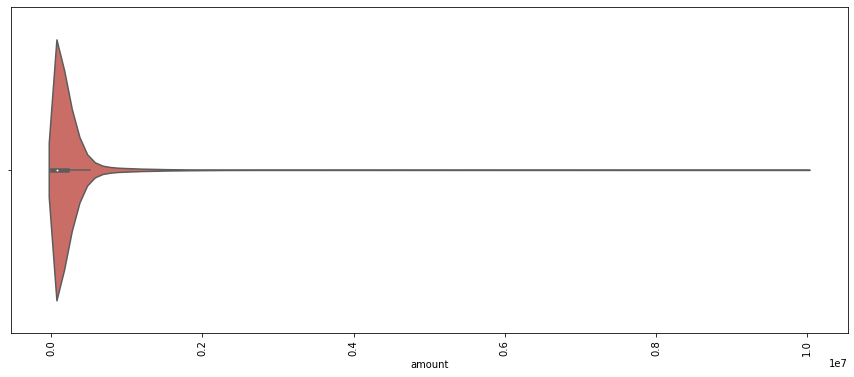

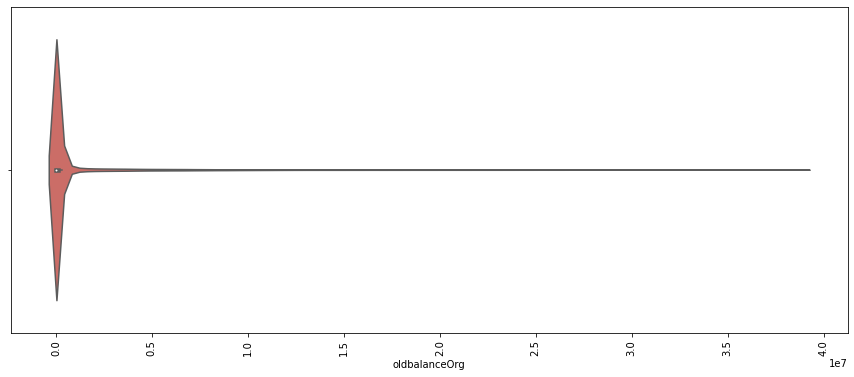

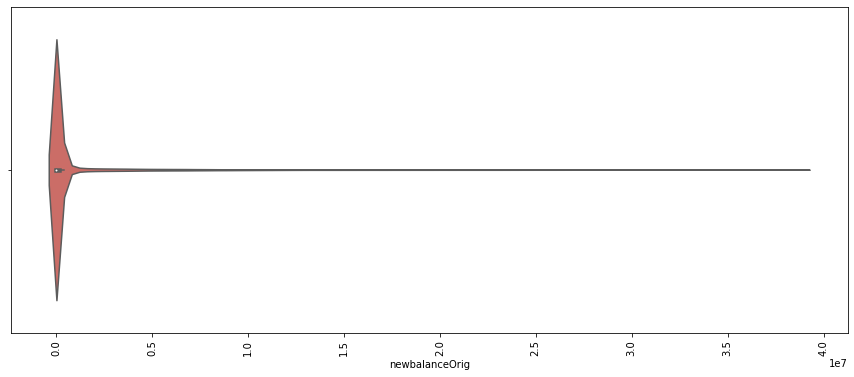

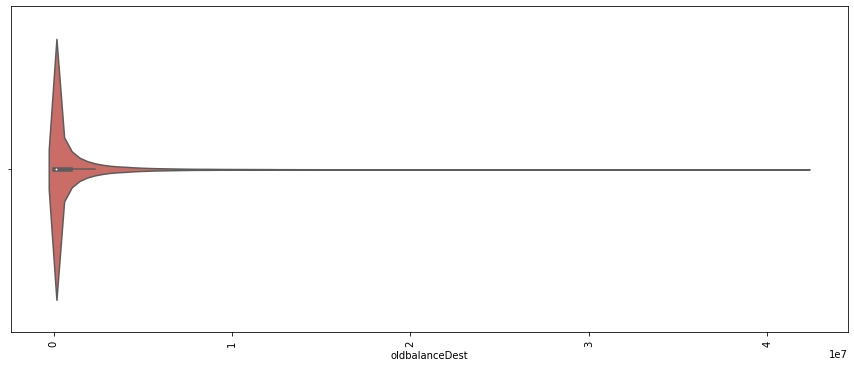

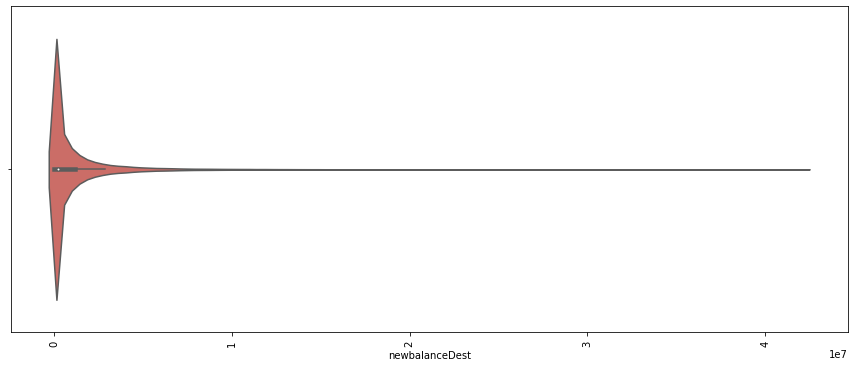

In [35]:
for i in numerical_columns:
    if i != 'isFraud':
        if i != 'isFlaggedFraud':
            plt.figure(figsize=(15,6))
            sns.violinplot(df[i], data = df, palette = 'hls')
            plt.xticks(rotation = 90)
            plt.show()

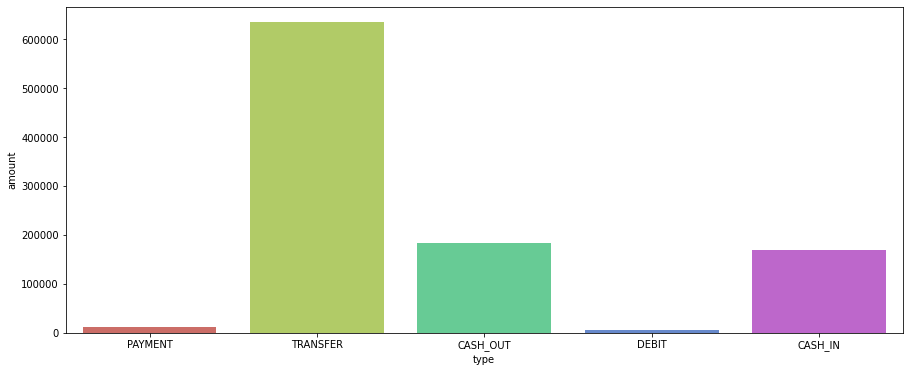

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['type'], y = df['amount'], data = df, ci = None, palette = 'hls')
plt.show()

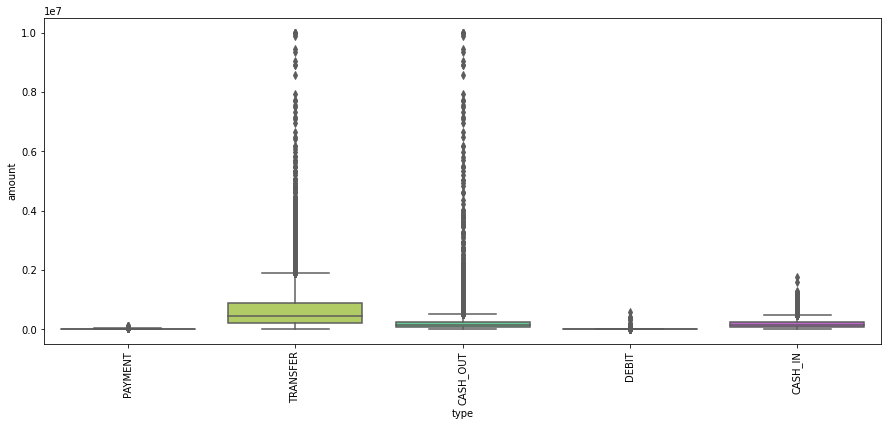

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['type'], y = df['amount'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

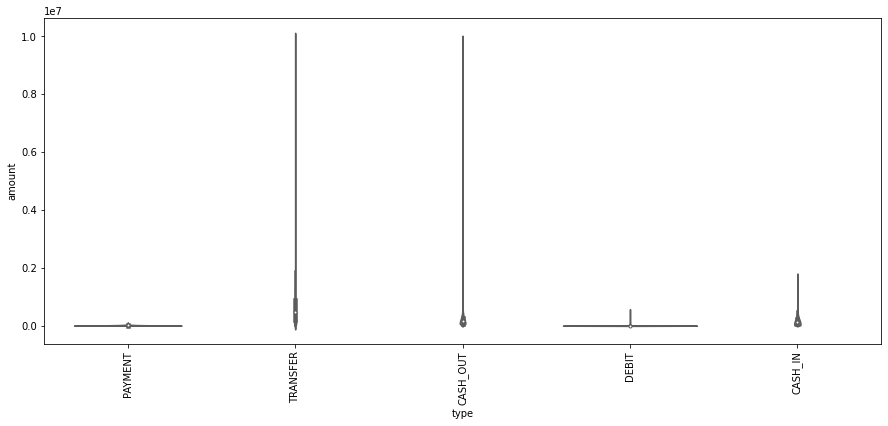

In [38]:
plt.figure(figsize=(15,6))
sns.violinplot(x = df['type'], y = df['amount'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

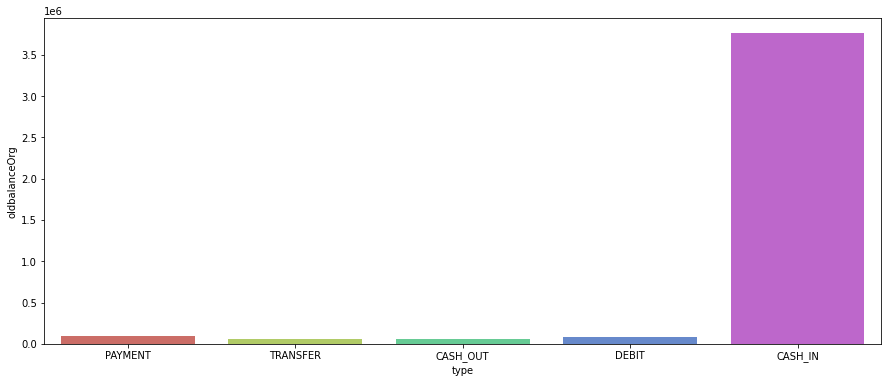

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['type'], y = df['oldbalanceOrg'], data = df, ci = None, palette = 'hls')
plt.show()

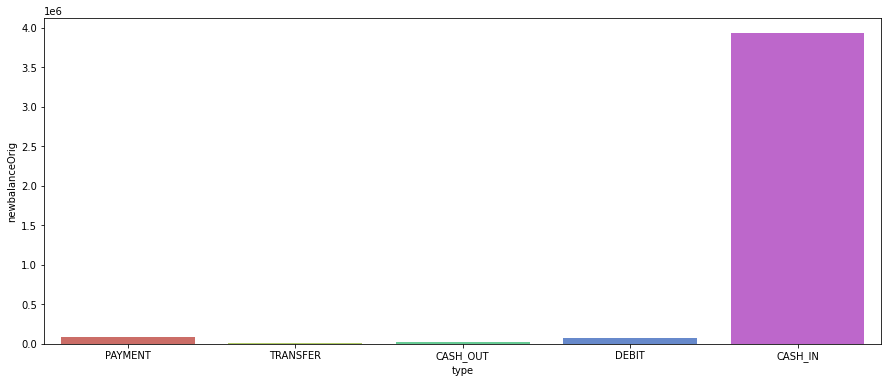

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['type'], y = df['newbalanceOrig'], data = df, ci = None, palette = 'hls')
plt.show()

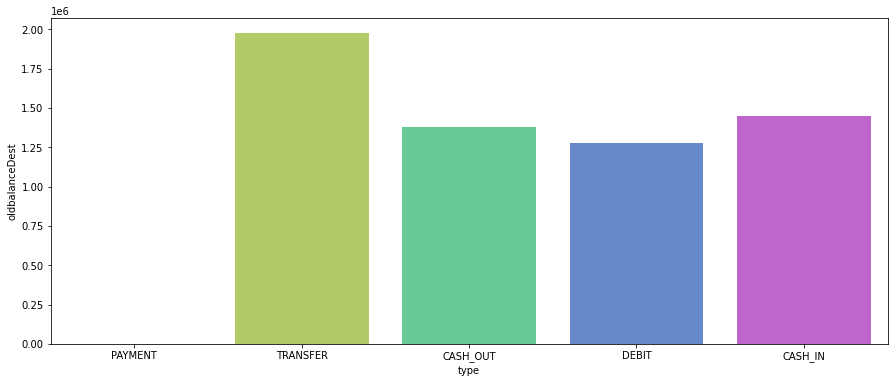

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['type'], y = df['oldbalanceDest'], data = df, ci = None, palette = 'hls')
plt.show()

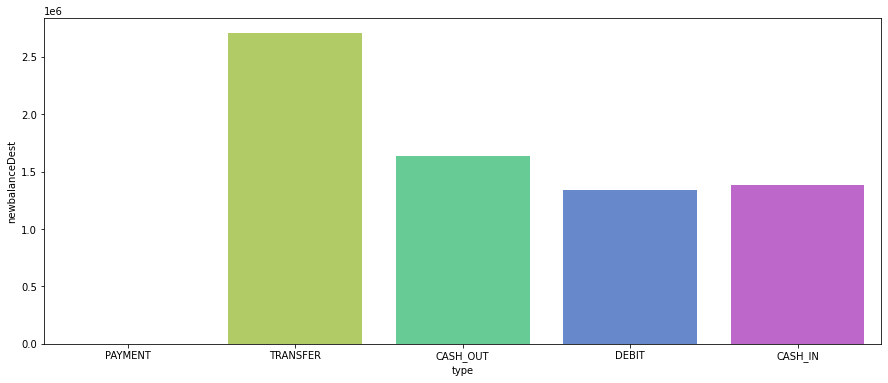

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['type'], y = df['newbalanceDest'], data = df, ci = None, palette = 'hls')
plt.show()

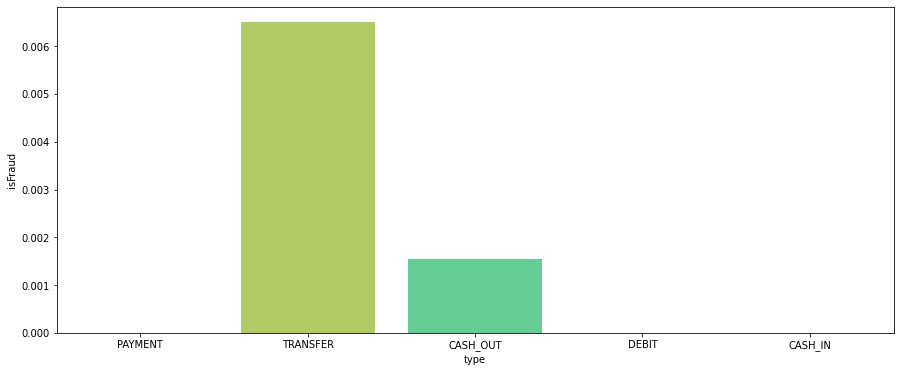

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['type'], y = df['isFraud'], data = df, ci = None, palette = 'hls')
plt.show()

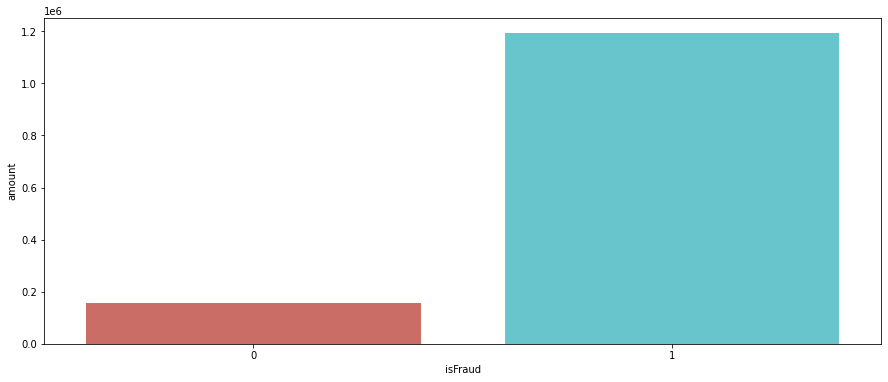

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['isFraud'], y = df['amount'], data = df, ci = None, palette = 'hls')
plt.show()

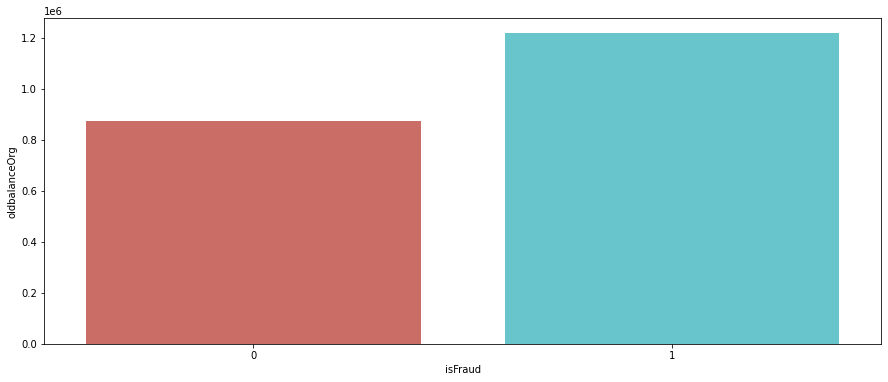

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['isFraud'], y = df['oldbalanceOrg'], data = df, ci = None, palette = 'hls')
plt.show()

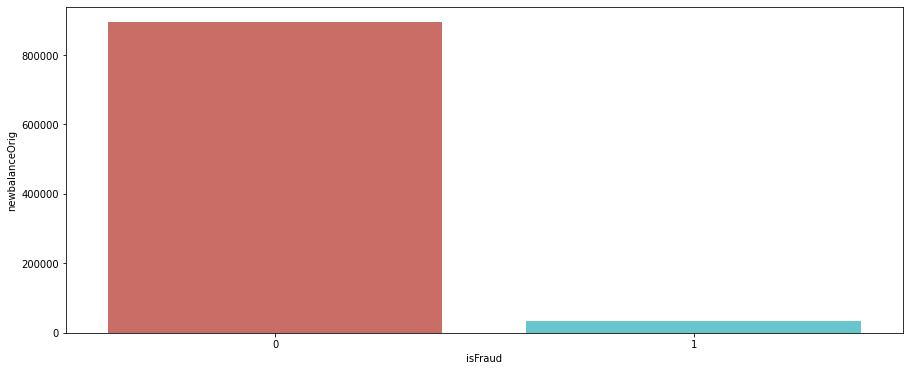

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['isFraud'], y = df['newbalanceOrig'], data = df, ci = None, palette = 'hls')
plt.show()

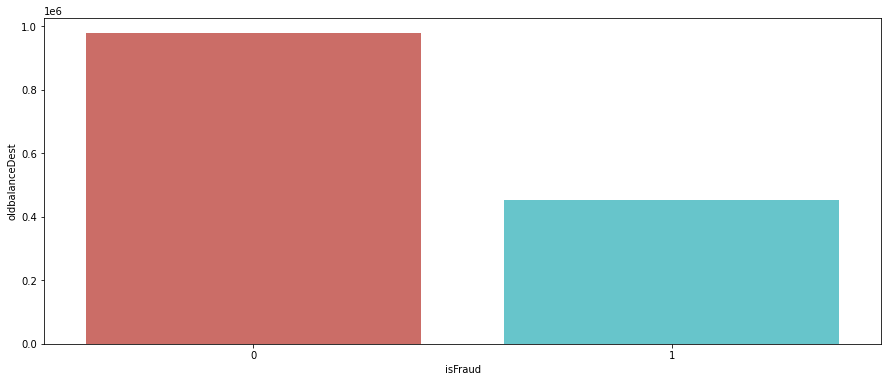

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['isFraud'], y = df['oldbalanceDest'], data = df, ci = None, palette = 'hls')
plt.show()

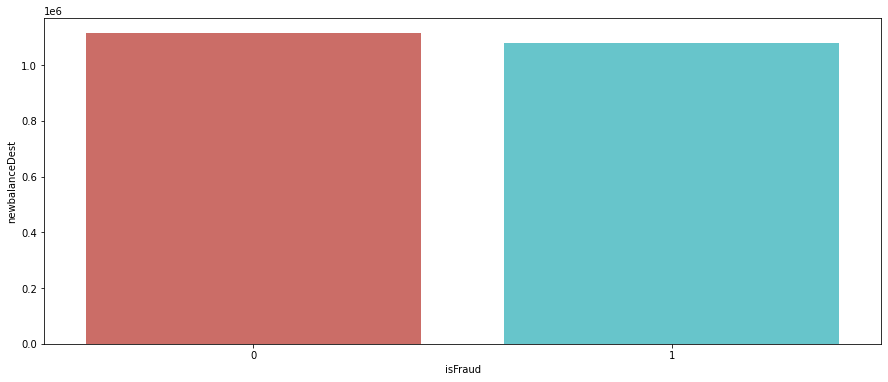

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['isFraud'], y = df['newbalanceDest'], data = df, ci = None, palette = 'hls')
plt.show()

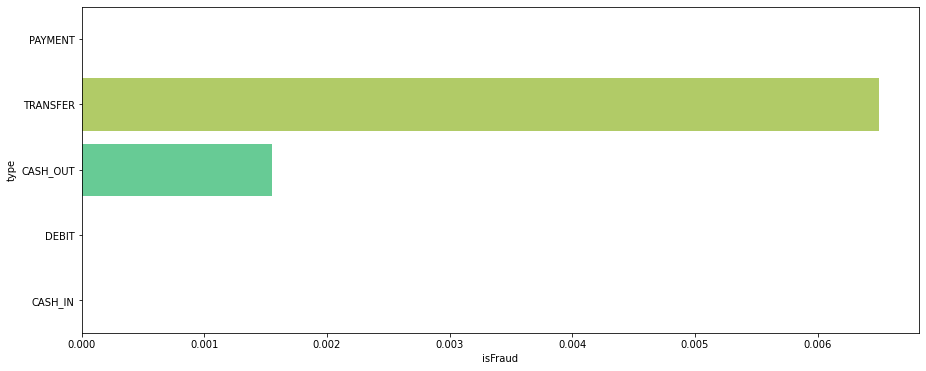

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['isFraud'], y = df['type'], data = df, ci = None, palette = 'hls')
plt.show()

In [50]:
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [51]:
df_corr = df.corr()

In [52]:
df_corr

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.025996      -0.006780       -0.007180   
amount         -0.025996  1.000000       0.004864       -0.001133   
oldbalanceOrg  -0.006780  0.004864       1.000000        0.999047   
newbalanceOrig -0.007180 -0.001133       0.999047        1.000000   
oldbalanceDest -0.002251  0.215558       0.093305        0.095182   
newbalanceDest -0.019503  0.311936       0.064049        0.063725   
isFraud         0.045030  0.128862       0.003829       -0.009438   

                oldbalanceDest  newbalanceDest   isFraud  
step                 -0.002251       -0.019503  0.045030  
amount                0.215558        0.311936  0.128862  
oldbalanceOrg         0.093305        0.064049  0.003829  
newbalanceOrig        0.095182        0.063725 -0.009438  
oldbalanceDest        1.000000        0.978403 -0.007552  
newbalanceDest        0.978403        1.000000 -0.000495  
isFraud              -0.007552       -0.000495  1.000000

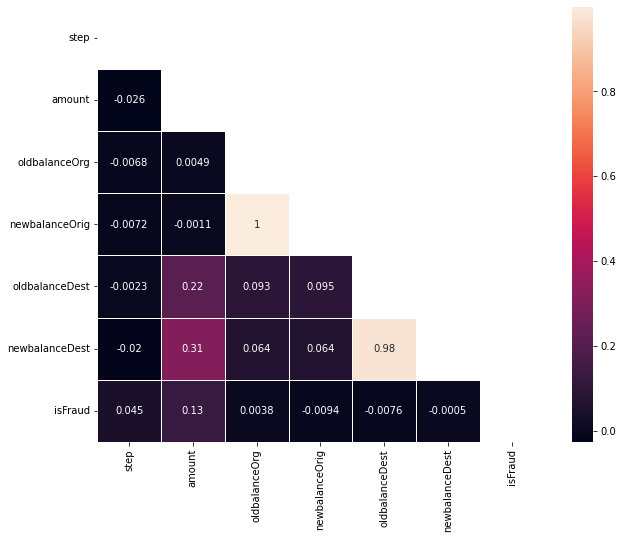

In [53]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [54]:
df_new = df.copy()

In [55]:
df_new['step_day_of_week'] = df_new['step'] % 7
df_new['step_month'] = (df_new['step'] - 1) // 30 + 1

df_new['log_amount'] = np.log1p(df_new['amount'])
df_new['sqrt_amount'] = np.sqrt(df_new['amount'])

df_new['balance_diff_orig'] = df_new['newbalanceOrig'] - df_new['oldbalanceOrg']
df_new['balance_diff_dest'] = df_new['newbalanceDest'] - df_new['oldbalanceDest']

df_encoded = pd.get_dummies(df_new['type'], prefix='type', drop_first=True)
df_new = pd.concat([df_new, df_encoded], axis=1)

df_new['amount_mean_rolling'] = df_new['amount'].rolling(window=3).mean()
df_new['amount_sum_7_days'] = df_new['amount'].rolling(window=7).sum()

df_new['amount_oldbalanceOrg'] = df_new['amount'] * df_new['oldbalanceOrg']
df_new['amount_newbalanceOrig'] = df_new['amount'] * df_new['newbalanceOrig']

In [56]:
df_new.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  step_day_of_week  step_month  ...  \
0             0.0        0                 1           1  ...   
1             0.0        0                 1           1  ...   
2             0.0        1                 1           1  ...   
3             0.0        1                 1           1  ...   
4             0.0        0                 1           1  ...   

   balance_diff_orig  balance_diff_dest  type_CASH_OUT  type_DEBIT  \
0           -9839.64                0.0              0           0   
1           -1864.28                0.0              0           0   
2            -181.00                0.0              0           0   
3            -181.00           -21182.0              1           0   
4          -11668.14                0.0              0           0   

   type_PAYMENT  type_TRANSFER  amount_mean_rolling  amount_sum_7_days  \
0             1              0                  NaN                NaN   
1             1              0                  NaN                NaN   
2             0              1          3961.640000                NaN   
3             0              0           742.093333                NaN   
4             1              0          4010.046667                NaN   

   amount_oldbalanceOrg  amount_newbalanceOrig  
0          1.674077e+09           1.577258e+09  
1          3.961409e+07           3.613855e+07  
2          3.276100e+04           0.000000e+00  
3          3.276100e+04           0.000000e+00  
4          4.848579e+08           3.487124e+08  

[5 rows x 22 columns]

In [57]:
df_new.tail()

step      type     amount  oldbalanceOrg  newbalanceOrig  \
1048570    95  CASH_OUT  132557.35      479803.00       347245.65   
1048571    95   PAYMENT    9917.36       90545.00        80627.64   
1048572    95   PAYMENT   14140.05       20545.00         6404.95   
1048573    95   PAYMENT   10020.05       90605.00        80584.95   
1048574    95   PAYMENT   11450.03       80584.95        69134.92   

         oldbalanceDest  newbalanceDest  isFraud  step_day_of_week  \
1048570       484329.37       616886.72        0                 4   
1048571            0.00            0.00        0                 4   
1048572            0.00            0.00        0                 4   
1048573            0.00            0.00        0                 4   
1048574            0.00            0.00        0                 4   

         step_month  ...  balance_diff_orig  balance_diff_dest  type_CASH_OUT  \
1048570           4  ...         -132557.35          132557.35              1   
1048571           4  ...           -9917.36               0.00              0   
1048572           4  ...          -14140.05               0.00              0   
1048573           4  ...          -10020.05               0.00              0   
1048574           4  ...          -11450.03               0.00              0   

         type_DEBIT  type_PAYMENT  type_TRANSFER  amount_mean_rolling  \
1048570           0             0              0         52163.000000   
1048571           0             1              0         48561.606667   
1048572           0             1              0         52204.920000   
1048573           0             1              0         11359.153333   
1048574           0             1              0         11870.043333   

         amount_sum_7_days  amount_oldbalanceOrg  amount_newbalanceOrig  
1048570          586375.93          6.360141e+10           4.602996e+10  
1048571          591065.80          8.979674e+08           7.996133e+08  
1048572          472818.61          2.905073e+08           9.056631e+07  
1048573          470240.51          9.078666e+08           8.074652e+08  
1048574          202016.49          9.227001e+08           7.915969e+08  

[5 rows x 22 columns]

In [58]:
df_new.shape

(1048575, 22)

In [59]:
df_new.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'step_day_of_week',
       'step_month', 'log_amount', 'sqrt_amount', 'balance_diff_orig',
       'balance_diff_dest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'amount_mean_rolling', 'amount_sum_7_days',
       'amount_oldbalanceOrg', 'amount_newbalanceOrig'],
      dtype='object')

In [60]:
df_new.duplicated().sum()

0

In [61]:
df_new.isnull().sum()

step                     0
type                     0
amount                   0
oldbalanceOrg            0
newbalanceOrig           0
oldbalanceDest           0
newbalanceDest           0
isFraud                  0
step_day_of_week         0
step_month               0
log_amount               0
sqrt_amount              0
balance_diff_orig        0
balance_diff_dest        0
type_CASH_OUT            0
type_DEBIT               0
type_PAYMENT             0
type_TRANSFER            0
amount_mean_rolling      2
amount_sum_7_days        6
amount_oldbalanceOrg     0
amount_newbalanceOrig    0
dtype: int64

In [62]:
df_new = df_new.dropna()

In [63]:
df_new.isnull().sum()

step                     0
type                     0
amount                   0
oldbalanceOrg            0
newbalanceOrig           0
oldbalanceDest           0
newbalanceDest           0
isFraud                  0
step_day_of_week         0
step_month               0
log_amount               0
sqrt_amount              0
balance_diff_orig        0
balance_diff_dest        0
type_CASH_OUT            0
type_DEBIT               0
type_PAYMENT             0
type_TRANSFER            0
amount_mean_rolling      0
amount_sum_7_days        0
amount_oldbalanceOrg     0
amount_newbalanceOrig    0
dtype: int64

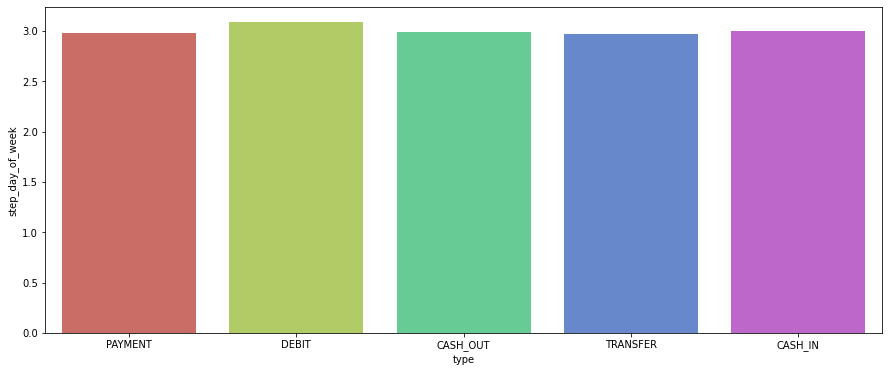

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['type'], y = df_new['step_day_of_week'], data = df, ci = None, palette = 'hls')
plt.show()

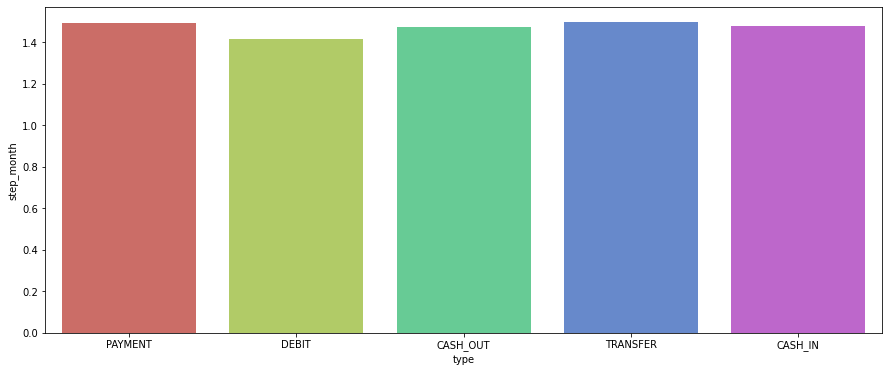

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['type'], y = df_new['step_month'], data = df, ci = None, palette = 'hls')
plt.show()

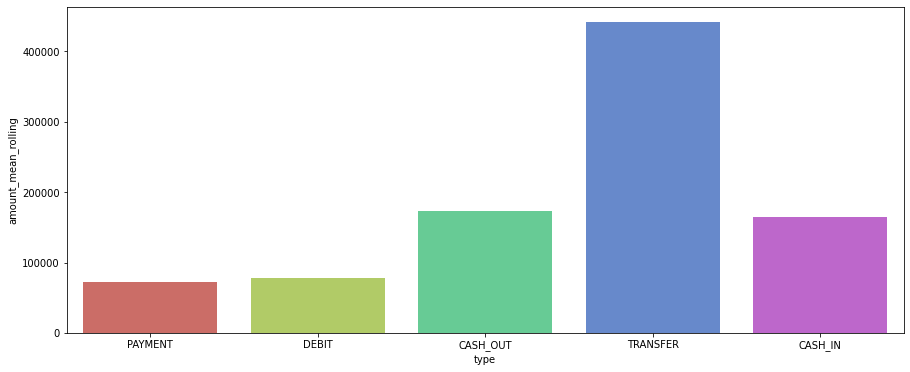

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['type'], y = df_new['amount_mean_rolling'], data = df, ci = None, palette = 'hls')
plt.show()

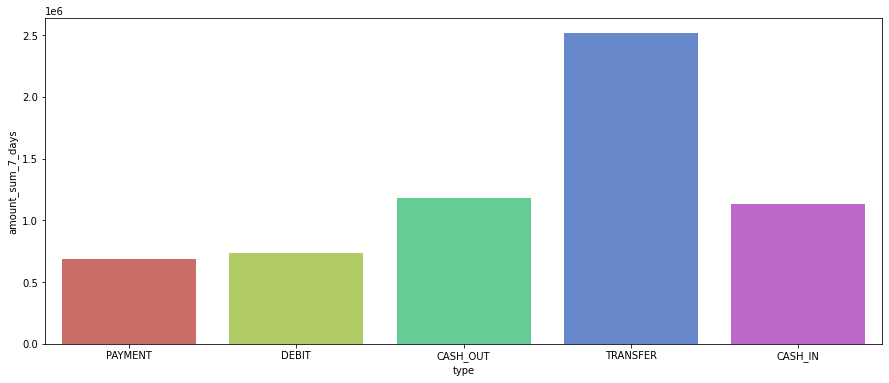

In [67]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['type'], y = df_new['amount_sum_7_days'], data = df, ci = None, palette = 'hls')
plt.show()

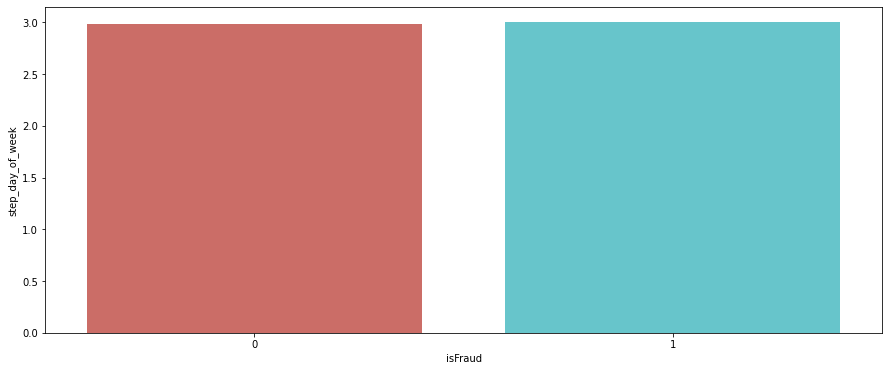

In [68]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['isFraud'], y = df_new['step_day_of_week'], data = df, ci = None, palette = 'hls')
plt.show()

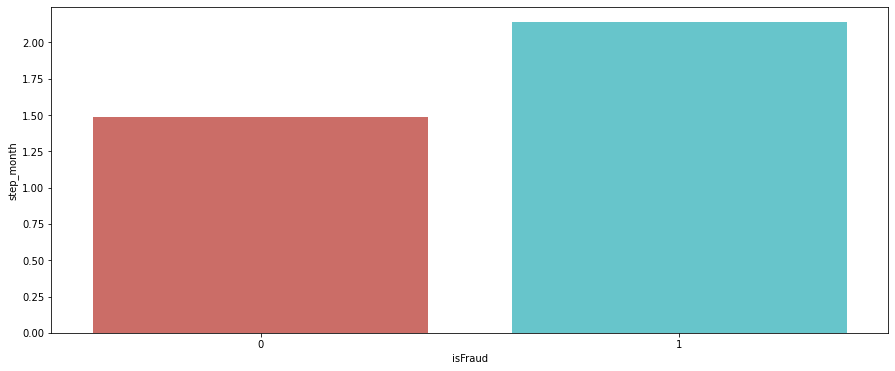

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['isFraud'], y = df_new['step_month'], data = df, ci = None, palette = 'hls')
plt.show()

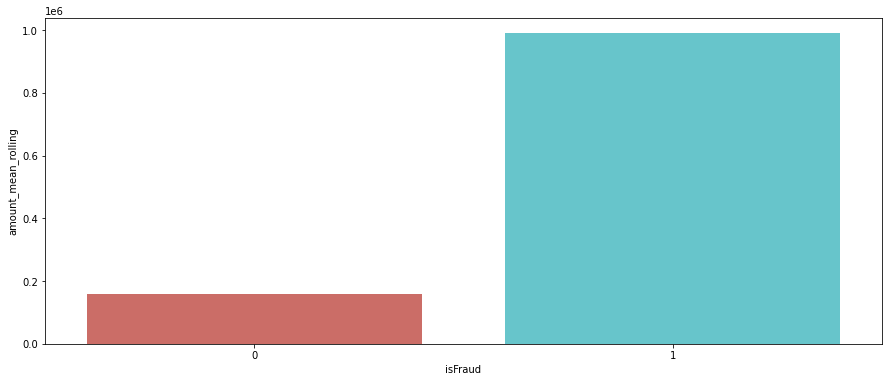

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['isFraud'], y = df_new['amount_mean_rolling'], data = df, ci = None, palette = 'hls')
plt.show()

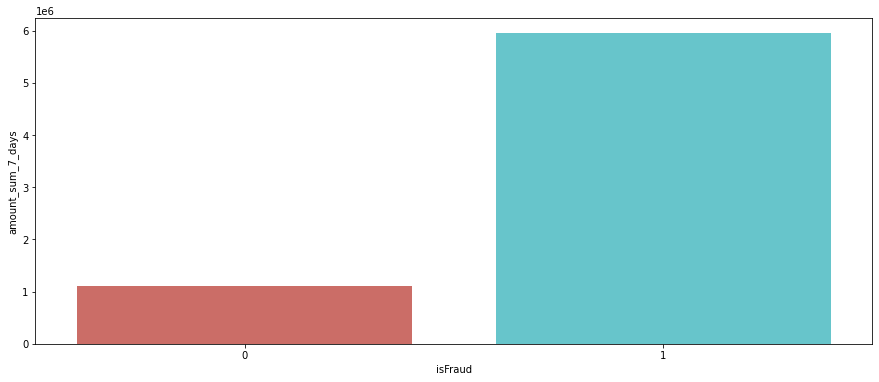

In [71]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_new['isFraud'], y = df_new['amount_sum_7_days'], data = df, ci = None, palette = 'hls')
plt.show()

In [72]:
df_new_corr = df_new.corr()

In [73]:
df_new_corr

step    amount  oldbalanceOrg  newbalanceOrig  \
step                   1.000000 -0.026001      -0.006783       -0.007183   
amount                -0.026001  1.000000       0.004863       -0.001134   
oldbalanceOrg         -0.006783  0.004863       1.000000        0.999047   
newbalanceOrig        -0.007183 -0.001134       0.999047        1.000000   
oldbalanceDest        -0.002255  0.215557       0.093304        0.095182   
newbalanceDest        -0.019507  0.311935       0.064048        0.063724   
isFraud                0.045166  0.129010       0.003850       -0.009429   
step_day_of_week      -0.033655  0.002464       0.002415        0.002517   
step_month             0.964296 -0.009953      -0.005937       -0.006164   
log_amount            -0.033575  0.638907       0.104502        0.108696   
sqrt_amount           -0.032407  0.895740       0.053510        0.054902   
balance_diff_orig     -0.010709 -0.131802       0.248333        0.290369   
balance_diff_dest     -0.083242  0.513276      -0.118078       -0.128185   
type_CASH_OUT         -0.013750  0.071254      -0.204550       -0.214549   
type_DEBIT            -0.005993 -0.047878      -0.022109       -0.022489   
type_PAYMENT           0.017109 -0.397463      -0.186253       -0.190113   
type_TRANSFER          0.004378  0.539283      -0.081976       -0.087814   
amount_mean_rolling   -0.037664  0.678452       0.005336       -0.000148   
amount_sum_7_days     -0.048438  0.501775       0.005716        0.001390   
amount_oldbalanceOrg   0.009659  0.260743       0.523720        0.510700   
amount_newbalanceOrig -0.002375  0.110406       0.725490        0.732029   

                       oldbalanceDest  newbalanceDest   isFraud  \
step                        -0.002255       -0.019507  0.045166   
amount                       0.215557        0.311935  0.129010   
oldbalanceOrg                0.093304        0.064048  0.003850   
newbalanceOrig               0.095182        0.063724 -0.009429   
oldbalanceDest               1.000000        0.978403 -0.007534   
newbalanceDest               0.978403        1.000000 -0.000469   
isFraud                     -0.007534       -0.000469  1.000000   
step_day_of_week             0.001986       -0.002370  0.000289   
step_month                  -0.000628       -0.013363  0.036389   
log_amount                   0.276585        0.323984  0.031955   
sqrt_amount                  0.275552        0.353266  0.068574   
balance_diff_orig            0.066817        0.010072 -0.293716   
balance_diff_dest            0.134147        0.336088  0.032079   
type_CASH_OUT                0.130119        0.160135  0.010320   
type_DEBIT                   0.010704        0.007813 -0.002739   
type_PAYMENT                -0.303959       -0.329066 -0.023546   
type_TRANSFER                0.130363        0.197708  0.049235   
amount_mean_rolling          0.184485        0.251149  0.150127   
amount_sum_7_days            0.162207        0.211988  0.160763   
amount_oldbalanceOrg         0.068363        0.057837  0.209847   
amount_newbalanceOrig        0.100010        0.066782  0.009880   

                       step_day_of_week  step_month  log_amount  ...  \
step                          -0.033655    0.964296   -0.033575  ...   
amount                         0.002464   -0.009953    0.638907  ...   
oldbalanceOrg                  0.002415   -0.005937    0.104502  ...   
newbalanceOrig                 0.002517   -0.006164    0.108696  ...   
oldbalanceDest                 0.001986   -0.000628    0.276585  ...   
newbalanceDest                -0.002370   -0.013363    0.323984  ...   
isFraud                        0.000289    0.036389    0.031955  ...   
step_day_of_week               1.000000   -0.052147    0.003020  ...   
step_month                    -0.052147    1.000000   -0.018203  ...   
log_amount                     0.003020   -0.018203    1.000000  ...   
sqrt_amount                    0.002806   -0.014844    0.885849  ...   
balance_diff_or

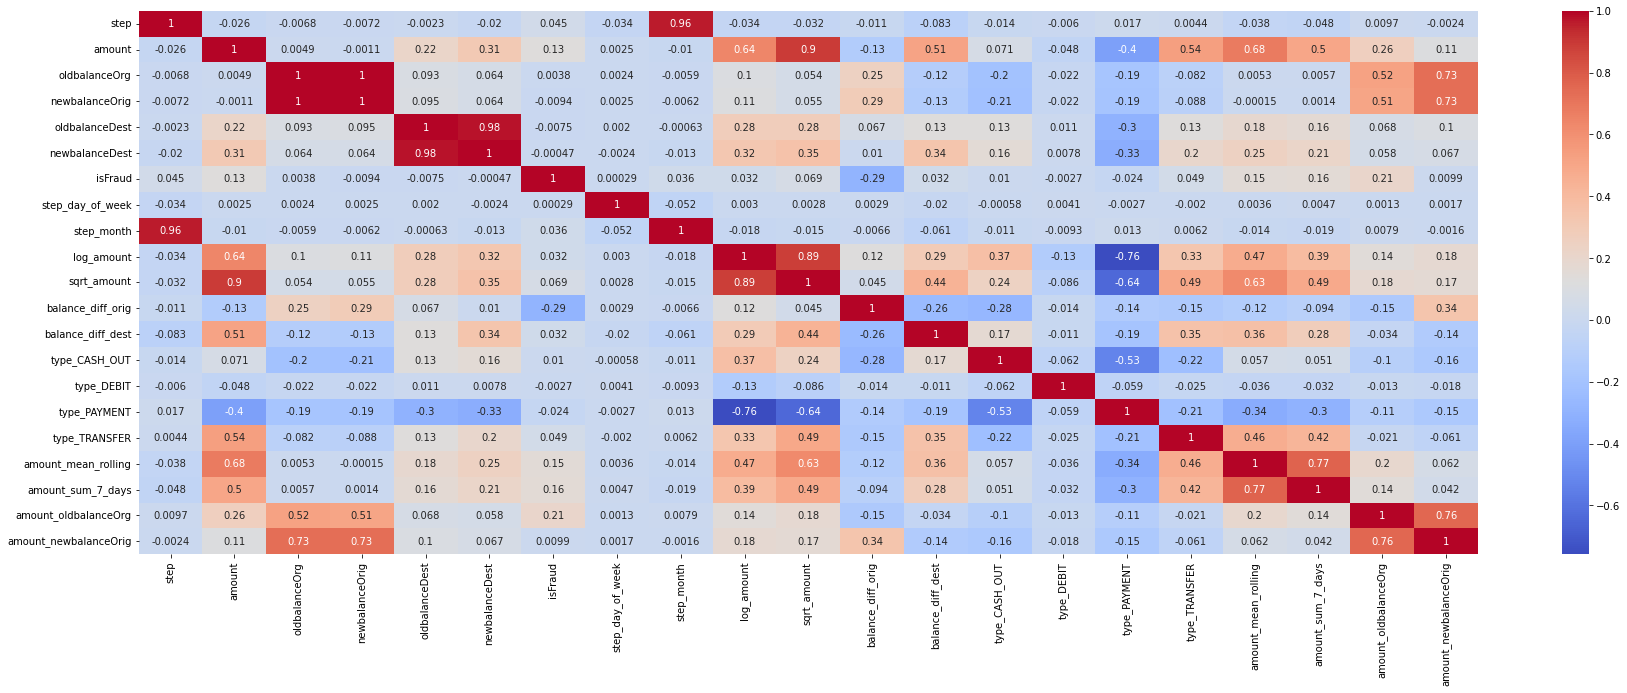

In [74]:
plt.figure(figsize=(30, 10))
sns.heatmap(df_new_corr, annot=True, cmap='coolwarm')
plt.show()

In [75]:
correlation_with_target = df_new.corr()['isFraud'].abs().sort_values(ascending=False)
print(correlation_with_target)

isFraud                  1.000000
balance_diff_orig        0.293716
amount_oldbalanceOrg     0.209847
amount_sum_7_days        0.160763
amount_mean_rolling      0.150127
amount                   0.129010
sqrt_amount              0.068574
type_TRANSFER            0.049235
step                     0.045166
step_month               0.036389
balance_diff_dest        0.032079
log_amount               0.031955
type_PAYMENT             0.023546
type_CASH_OUT            0.010320
amount_newbalanceOrig    0.009880
newbalanceOrig           0.009429
oldbalanceDest           0.007534
oldbalanceOrg            0.003850
type_DEBIT               0.002739
newbalanceDest           0.000469
step_day_of_week         0.000289
Name: isFraud, dtype: float64


In [76]:
correlation_threshold = 0.01
low_correlation_features = correlation_with_target[correlation_with_target < correlation_threshold]
features_to_drop = low_correlation_features.index.tolist()
print(features_to_drop)

['amount_newbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'oldbalanceOrg', 'type_DEBIT', 'newbalanceDest', 'step_day_of_week']


In [77]:
df_new = df_new.drop(['amount_newbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'oldbalanceOrg', 'type_DEBIT', 'newbalanceDest', 'step_day_of_week'], axis = 1)

In [78]:
df_new.shape

(1048569, 15)

In [79]:
df_new.columns

Index(['step', 'type', 'amount', 'isFraud', 'step_month', 'log_amount',
       'sqrt_amount', 'balance_diff_orig', 'balance_diff_dest',
       'type_CASH_OUT', 'type_PAYMENT', 'type_TRANSFER', 'amount_mean_rolling',
       'amount_sum_7_days', 'amount_oldbalanceOrg'],
      dtype='object')

In [80]:
correlation_matrix = df_new.corr()

In [81]:
correlation_matrix

step    amount   isFraud  step_month  log_amount  \
step                  1.000000 -0.026001  0.045166    0.964296   -0.033575   
amount               -0.026001  1.000000  0.129010   -0.009953    0.638907   
isFraud               0.045166  0.129010  1.000000    0.036389    0.031955   
step_month            0.964296 -0.009953  0.036389    1.000000   -0.018203   
log_amount           -0.033575  0.638907  0.031955   -0.018203    1.000000   
sqrt_amount          -0.032407  0.895740  0.068574   -0.014844    0.885849   
balance_diff_orig    -0.010709 -0.131802 -0.293716   -0.006641    0.121255   
balance_diff_dest    -0.083242  0.513276  0.032079   -0.061202    0.292970   
type_CASH_OUT        -0.013750  0.071254  0.010320   -0.011449    0.371926   
type_PAYMENT          0.017109 -0.397463 -0.023546    0.012545   -0.758246   
type_TRANSFER         0.004378  0.539283  0.049235    0.006219    0.333290   
amount_mean_rolling  -0.037664  0.678452  0.150127   -0.014417    0.472605   
amount_sum_7_days    -0.048438  0.501775  0.160763   -0.018511    0.390330   
amount_oldbalanceOrg  0.009659  0.260743  0.209847    0.007881    0.142036   

                      sqrt_amount  balance_diff_orig  balance_diff_dest  \
step                    -0.032407          -0.010709          -0.083242   
amount                   0.895740          -0.131802           0.513276   
isFraud                  0.068574          -0.293716           0.032079   
step_month              -0.014844          -0.006641          -0.061202   
log_amount               0.885849           0.121255           0.292970   
sqrt_amount              1.000000           0.045318           0.438057   
balance_diff_orig        0.045318           1.000000          -0.256158   
balance_diff_dest        0.438057          -0.256158           1.000000   
type_CASH_OUT            0.244332          -0.277062           0.174827   
type_PAYMENT            -0.641869          -0.135864          -0.192612   
type_TRANSFER            0.491946          -0.151671           0.353838   
amount_mean_rolling      0.626665          -0.120276           0.363439   
amount_sum_7_days        0.486994          -0.094479           0.277206   
amount_oldbalanceOrg     0.182527          -0.147863          -0.034212   

                      type_CASH_OUT  type_PAYMENT  type_TRANSFER  \
step                      -0.013750      0.017109       0.004378   
amount                     0.071254     -0.397463       0.539283   
isFraud                    0.010320     -0.023546       0.049235   
step_month                -0.011449      0.012545       0.006219   
log_amount                 0.371926     -0.758246       0.333290   
sqrt_amount                0.244332     -0.641869       0.491946   
balance_diff_orig         -0.277062     -0.135864      -0.151671   
balance_diff_dest          0.174827     -0.192612       0.353838   
type_CASH_OUT              1.000000     -0.531031      -0.223456   
type_PAYMENT              -0.531031      1.000000      -0.214346   
type_TRANSFER             -0.223456     -0.214346       1.000000   
amount_mean_rolling        0.056828     -0.335711       0.464530   
amount_sum_7_days          0.050668     -0.304939       0.424467   
amount_oldbalanceOrg      -0.101826     -0.111911      -0.020725   

                      amount_mean_rolling  amount_sum_7_days  \
step                            -0.037664          -0.048438   
amount                           0.678452           0.501775   
isFraud                          0.150127           0.160763   
step_month                      -0.014417          -0.018511   
log_amount                       0.472605           0.390330   
sqrt_amount                      0.626665           0.486994   
balance_diff_orig               -0.120276          -0.094479   
balance_diff_dest                0.363439           0.277206   
type_CASH_OUT                    0.056828           0.050668   
type_PAYMENT                    -0.335711          -0.304939   
type

In [82]:
correlation_threshold = 0.7
mask = correlation_matrix.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if mask.iloc[i, j]:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [83]:
features_to_drop

{'amount_sum_7_days', 'sqrt_amount', 'step_month', 'type_PAYMENT'}

In [84]:
df_new = df_new.drop(['amount_sum_7_days', 'sqrt_amount', 'step_month', 'type_PAYMENT'], axis = 1)

In [85]:
df_new = df_new.drop(['step', 'type'], axis = 1)

In [86]:
df_new.head()

amount  isFraud  log_amount  balance_diff_orig  balance_diff_dest  \
6   7107.77        0    8.869085           -7107.77               0.00   
7   7861.64        0    8.969878           -7861.64               0.00   
8   4024.36        0    8.300370           -2671.00               0.00   
9   5337.77        0    8.582751           -5337.77           -1549.21   
10  9644.94        0    9.174292           -4465.00          147137.12   

    type_CASH_OUT  type_TRANSFER  amount_mean_rolling  amount_oldbalanceOrg  
6               0              0          8864.540000          1.302108e+09  
7               0              0          7595.706667          1.384334e+09  
8               0              0          6331.256667          1.074907e+07  
9               0              0          5741.256667          2.226918e+08  
10              0              0          6335.690000          4.306466e+07

In [87]:
df_new.tail()

amount  isFraud  log_amount  balance_diff_orig  balance_diff_dest  \
1048570  132557.35        0   11.794778         -132557.35          132557.35   
1048571    9917.36        0    9.202143           -9917.36               0.00   
1048572   14140.05        0    9.556837          -14140.05               0.00   
1048573   10020.05        0    9.212443          -10020.05               0.00   
1048574   11450.03        0    9.345835          -11450.03               0.00   

         type_CASH_OUT  type_TRANSFER  amount_mean_rolling  \
1048570              1              0         52163.000000   
1048571              0              0         48561.606667   
1048572              0              0         52204.920000   
1048573              0              0         11359.153333   
1048574              0              0         11870.043333   

         amount_oldbalanceOrg  
1048570          6.360141e+10  
1048571          8.979674e+08  
1048572          2.905073e+08  
1048573          9.078666e+08  
1048574          9.227001e+08

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ['amount', 'log_amount', 'balance_diff_orig', 'balance_diff_dest', 'amount_mean_rolling', 'amount_oldbalanceOrg']
scaled_features = scaler.fit_transform(df_new[features_to_scale])
scaled_df = df_new.copy()
scaled_df[features_to_scale] = scaled_features

In [89]:
scaled_df

amount  isFraud  log_amount  balance_diff_orig  balance_diff_dest  \
6        0.000711        0    0.547581           0.847360           0.252186   
7        0.000786        0    0.553872           0.847296           0.252186   
8        0.000402        0    0.512087           0.847734           0.252186   
9        0.000534        0    0.529711           0.847509           0.252156   
10       0.000964        0    0.566629           0.847583           0.255018   
...           ...      ...         ...                ...                ...   
1048570  0.013256        0    0.730177           0.836763           0.254738   
1048571  0.000992        0    0.568368           0.847122           0.252186   
1048572  0.001414        0    0.590505           0.846766           0.252186   
1048573  0.001002        0    0.569010           0.847114           0.252186   
1048574  0.001145        0    0.577336           0.846993           0.252186   

         type_CASH_OUT  type_TRANSFER  amount_mean_rolling  \
6                    0              0             0.000880   
7                    0              0             0.000752   
8                    0              0             0.000625   
9                    0              0             0.000566   
10                   0              0             0.000626   
...                ...            ...                  ...   
1048570              1              0             0.005226   
1048571              0              0             0.004864   
1048572              0              0             0.005230   
1048573              0              0             0.001130   
1048574              0              0             0.001181   

         amount_oldbalanceOrg  
6                6.543256e-06  
7                6.956454e-06  
8                5.401540e-08  
9                1.119054e-06  
10               2.164053e-07  
...                       ...  
1048570          3.196051e-04  
1048571          4.512399e-06  
1048572          1.459836e-06  
1048573          4.562144e-06  
1048574          4.636684e-06  

[1048569 rows x 9 columns]

In [90]:
X = scaled_df.drop('isFraud', axis = 1)
y = scaled_df['isFraud']

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [95]:
y_resampled.value_counts()

0    1047429
1    1047429
Name: isFraud, dtype: int64

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [99]:
logreg_y_pred = logreg.predict(X_test)

In [100]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logreg_y_pred))
print("Precision:", precision_score(y_test, logreg_y_pred))
print("Recall:", recall_score(y_test, logreg_y_pred))
print("F1 Score:", f1_score(y_test, logreg_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_y_pred))
print("Classification Report:")
print(classification_report(y_test, logreg_y_pred))
print()

Logistic Regression:
Accuracy: 0.9473425431771096
Precision: 0.9171058253809998
Recall: 0.9835884020889224
F1 Score: 0.9491843983066073
Confusion Matrix:
[[190862  18624]
 [  3438 206048]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95    209486
           1       0.92      0.98      0.95    209486

    accuracy                           0.95    418972
   macro avg       0.95      0.95      0.95    418972
weighted avg       0.95      0.95      0.95    418972




In [101]:
log_accuracy = accuracy_score(y_test, logreg_y_pred)

In [102]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
dt_y_pred = dt.predict(X_test)

In [104]:
print("Decision Trees:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1 Score:", f1_score(y_test, dt_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))
print()

Decision Trees:
Accuracy: 0.997737318961649
Precision: 0.9972009231708248
Recall: 0.99827673448345
F1 Score: 0.9977385388289066
Confusion Matrix:
[[208899    587]
 [   361 209125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209486
           1       1.00      1.00      1.00    209486

    accuracy                           1.00    418972
   macro avg       1.00      1.00      1.00    418972
weighted avg       1.00      1.00      1.00    418972




In [105]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)

In [106]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [107]:
xgb_y_pred = xgb_model.predict(X_test)

In [108]:
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Precision:", precision_score(y_test, xgb_y_pred))
print("Recall:", recall_score(y_test, xgb_y_pred))
print("F1 Score:", f1_score(y_test, xgb_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_y_pred))
print("Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print()

XGBoost:
Accuracy: 0.9933432305738809
Precision: 0.9939681007164672
Recall: 0.992710730072654
F1 Score: 0.9933390174991102
Confusion Matrix:
[[208224   1262]
 [  1527 207959]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    209486
           1       0.99      0.99      0.99    209486

    accuracy                           0.99    418972
   macro avg       0.99      0.99      0.99    418972
weighted avg       0.99      0.99      0.99    418972




In [109]:
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

In [110]:
labels = ['Logistic Regression', 'Decision Tree', 'XGBoost']
accuracies = [log_accuracy, dt_accuracy, xgb_accuracy]

fig = go.Figure(data=[go.Bar(x=labels, y=accuracies)])
fig.update_layout(title='Accuracy Comparison',
                  xaxis_title='Classifier',
                  yaxis_title='Accuracy',
                  yaxis_range=[0, 1])

fig.show()

In [111]:
import pickle
filename = 'logistic_regression_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [113]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
52372/52372 [==============================] - 149s 3ms/step - loss: 0.1853 - accuracy: 0.9206 - val_loss: 0.2021 - val_accuracy: 0.9075
Epoch 2/10
52372/52372 [==============================] - 173s 3ms/step - loss: 0.1435 - accuracy: 0.9427 - val_loss: 0.1201 - val_accuracy: 0.9573
Epoch 3/10
52372/52372 [==============================] - 146s 3ms/step - loss: 0.1311 - accuracy: 0.9486 - val_loss: 0.1126 - val_accuracy: 0.9603
Epoch 4/10
52372/52372 [==============================] - 147s 3ms/step - loss: 0.1246 - accuracy: 0.9516 - val_loss: 0.1241 - val_accuracy: 0.9509
Epoch 5/10
52372/52372 [==============================] - 146s 3ms/step - loss: 0.1202 - accuracy: 0.9537 - val_loss: 0.1051 - val_accuracy: 0.9606
Epoch 6/10
52372/52372 [==============================] - 144s 3ms/step - loss: 0.1168 - accuracy: 0.9552 - val_loss: 0.1067 - val_accuracy: 0.9632
Epoch 7/10
52372/52372 [==============================] - 145s 3ms/step - loss: 0.1134 - accuracy: 0.9567 - val_

In [114]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13093/13093 [==============================] - 27s 2ms/step - loss: 0.1182 - accuracy: 0.9526
Test Loss: 0.11822345852851868
Test Accuracy: 0.9526054263114929
